In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default. 
# quell warnings
import warnings
warnings.filterwarnings('ignore')

## MNIST DataSet with the Multi-Perceptron Model

### Character Recognition

The *MNIST* Data set is a collection of arrays representing Hand Written Digits (0-9) using pixels

This set of lectures will use the *Classical* model of using TensorFlow

The next will use the *Esimator* model. This is more like using Scikit-Learn where you create an input function, train a model with it then use it to make predictions.

For this series of lectures we'll use the more Manual way.




In [3]:
from tensorflow.examples.tutorials.mnist import input_data

The one_hot function provides a simple interface to convert class label integers into a so-called one-hot array, where each unique label is represented as a column in the new array.

In [5]:
# 
mnist = input_data.read_data_sets("MNIST_data/",
                                  one_hot=True)

Extracting /Users/person/Coding/Udemy/Python3_Data_Science_And_Machine_Learning/Refactored_Py_DS_ML_Bootcamp-master/22-Deep\ Learning/MNIST_data/train-images-idx3-ubyte.gz
Extracting /Users/person/Coding/Udemy/Python3_Data_Science_And_Machine_Learning/Refactored_Py_DS_ML_Bootcamp-master/22-Deep\ Learning/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /Users/person/Coding/Udemy/Python3_Data_Science_And_Machine_Learning/Refactored_Py_DS_ML_Bootcamp-master/22-Deep\ Learning/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /Users/person/Coding/Udemy/Python3_Data_Science_And_Machine_Learning/Refactored_Py_DS_ML_Bootcamp-master/22-Deep\ Learning/MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

Notice that the mnist object has a number of labels (.train, .test, .images, etc)

In [7]:
# This is just a series of NumPy arrays
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Note the Labels that were applied by one_hot encoding. 

In [34]:
# Note that the labels are "one_hot" encoded. 
# Each of the label positions stands for the number it represents (like IPv4)
[0,1,2...]
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [8]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

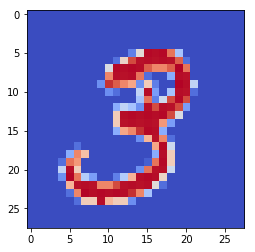

In [13]:
# If we visualize array 1, notice that everything is empty except label 3
# [0,1,2,3,4,5,6,7...] - only place 3 (array element 4) is True
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='coolwarm')

In [14]:
# 55000 images with 784 pixes per image
mnist.train.images.shape

(55000, 784)

In [10]:
# Confirm the number of examples
mnist.train.num_examples

55000

In [11]:
# Note that the test examples are about 1/5th of the total
mnist.test.num_examples

10000

Now visualize the dataset

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default. 
sns.set_style("darkgrid") # set a grey grid as a background
# quell warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
# grab a single image
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
mnist.train.images[1].shape

(784,)

We want to change this from being a string of 784 pixels to a dataset with a shape of 28x28 (the original dataset size - 28 * 28= 784) 

In [15]:
mnist.train.images[1].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

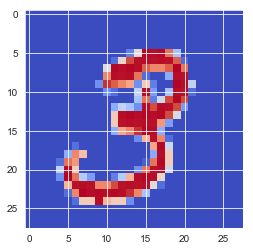

In [21]:
# Now plot it out with plt.imshow
plt.imshow(mnist.train.images[1].reshape(28,28), cmap='coolwarm')

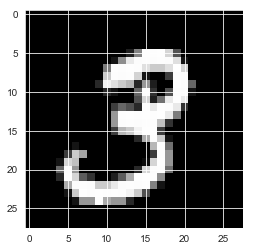

In [18]:
# If we wanted to visualize this in Grayscale, add the cmap
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')

We actually don't want to pass this in with the visualizeable format, we want to pass it in as 784,1 - a Vector of numbers. 

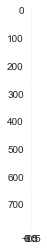

In [22]:
# Doesn't really show us anything - aspect too small
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray')

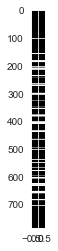

In [23]:
# to slightly improve this
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

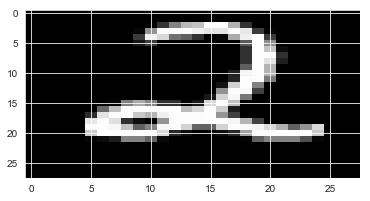

In [48]:
# Can also show horizontally
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray',aspect=0.5)

### Creating a tensorflow model to classify the data

All of this is a longhand way of doing things that will be simpler using TensorFlow Estimators for real world data. This is an example to pull back the curtains and see the longhand

**Now to create the model**

Notice how the second dimension of x = the first dimension of W (784) and that W's second variable matches up with b's first (only) variable  
e.g  
x [None,784]  
W [784,10]  
b [10]  

In [28]:
# Create a placeholder with dtype and a shape
# We also want to break them up into batches
# weirdly, "shape" is also used to batch. So:
# shape=[None,784] means "[batchsize,vectorsize]" without a definition yet for batchsize
x = tf.placeholder(tf.float32,shape=[None,784])

In [30]:
# now define weights
# tf.zeros(shape, dtype=tf.float32, name=None) - 
# in this case 784 is the shape and 10 means that we expect 10 possible target labels (0-9)
W = tf.Variable(tf.zeros([784,10]))

In [31]:
# Now add Biases
b = tf.Variable(tf.zeros([10]))

**Now to create the graph/Tensor object**


In [32]:
# Creating the graph with Matrix Multiply
y=tf.matmul(x,W)+ b

In [51]:
# The Tensor object
y

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

In [50]:
type(y)

tensorflow.python.framework.ops.Tensor

#### Create an object with the Correct Labels


In [33]:
# Here we pass in the Correct labels
# Notice how this is very similar to the original x.
# the shape=[a label for the batch, 10 possible values]
# e.g

y_true = tf.placeholder(tf.float32,shape=[None,10])

In [38]:
# the 10 matches the hot encoding labels (see above)
len(mnist.train.labels[1])

10

#### Now find a Loss and Optimizer

This takes care of the mathematics of running the gradient descent optimizer then minimizing that error. 

Sidenote:
Logits is an overloaded term which can mean many different things: In Math, Logit is a function that maps probabilities ( [0, 1] ) to R ( (-inf, inf) ) Probability of 0.5 corresponds to a logit of 0. Negative logit correspond to probabilities less than 0.5, positive to > 0.5.

Essentially   
**Optimizer** is the *Method of how you're trying to reduce the error*  
and  
**Cross Entropy** is *how you're actually defining the error*

You can think of Cross Entropy as a fancy way of saying "the actual error"

**Cross Entropy**

In [40]:
# Set Cross Entropy
# here we say that the correct labels can be found in y_true and the logits (what we're predicting)=y
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))

**Optimizer**

In [42]:
# Set up Optimizer. 
# Play around with learning_rate - lower means slower, but more accurate (and the reverse is true)
# "guess and check"
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [43]:
# Here we say "Grab that optimizer and Minimize these types of errors"
train = optimizer.minimize(cross_entropy)

#### Everything up to this point has been defined but not run yet. 

Everything is essentially a *Static Graph* until we tell them to run at Session


### Creating a session

#### Initialize the variables

In [53]:
# Initializing the variables
init = tf.global_variables_initializer()

When running this should get close to 90% accuracy with just this setup. This isn't great since we're already working with well known data. Very Good Models get over 99% accuracy with Convolutional Network Models.


#### Running the session

In [45]:
# Now run the session
with tf.Session() as sess:
    # first run the initializer
    sess.run(init)
    # then train the model for a certain amount of steps, in this case 1000
    for step in range(1000):
        # mnist has a built-in convenience method for training the next batch. 
        # Real world is less likely to have these
        # Define the Batch Size as 100, then grab their x values and y target labels
        batch_x, batch_y = mnist.train.next_batch(100)
        # passing in the batches to the placeholders we defined earlier
        sess.run(train,feed_dict={x:batch_x, y_true:batch_y})
    # where are these equal to each other between my predicted labels vs the true label actually is    
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    # Calculate accuracy
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    # print out accuracy
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9183


And that's that. 

**You now have an estimation using *Classical TensorFlow***

## Using TensorFlow Estimators
### Analyzing the Iris Dataset

The newer and easier way of doing things. Much closer to what we've done with Scikit-Learn

**Estimator Steps**
- Read in the data (normalize if necessary)
- Train/Test Split the data
- Create Estimator Feature Columns (a list of specialized feature columns)
- Create Input Estimator Function (a way of organizing your training data)
- Train Estimator Model 
- Predict with New Test Input Function



**Using the Iris CSV file with pandas get data into correct formats**

In [58]:
df = pd.read_csv('iris.csv')

In [59]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


**To use TensorFlow we have to:**
- scrub the column names of spaces and special characters
- the Target column (binary yes or no) must be an integer


In [61]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [62]:
# scrub spaces and parens
df.columns = ['sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'target']

In [63]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [64]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [65]:
# recast target as an integer
df['target'] = df['target'].apply(int)

In [66]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Now grab the features and separate them from the target

target y = just 'target'  
features X = 'everything but 'target''

In [71]:
y = df['target']
# remember to use axis=1 for columnsa
X = df.drop('target',axis=1)

In [69]:
# Y is just the actual classes. 
# One problem is that they're currently sorted in order, we'll shuffle during training
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [72]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Train/Test Split**

In [73]:
# ML imports
import sklearn
from sklearn import metrics
# Linear Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Logistic Regression
#
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [75]:
# The Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Using TensorFlow**

**Create Feature Columns** using tf.feature_column.numeric_column

In [76]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [78]:
feat_cols = []
for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [79]:
feat_cols

[NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

**Now create an Input Function**

need 2 - one for training and one for evaluation


A note about batch_size - play around with the value - too large a size will produce errors.  
Errors in TensorFlow often present themselves as *Predictions that are empty or None*

An *Epoch* is when you've gone through your training data one time. So num_epochs=5 sets a limit - after the data has been trained 5 times, it's complete. (even if it's hit the number of steps indicated in the estimator). We'll work with steps later on.

In [82]:
# Create The Input Function
# two main types of inputs - one for numpy and one for pandas
# 'x', 'y=None', 'batch_size=128', 'num_epochs=1', 'shuffle=None',et al
# we want shuffle=True to compensate for the earlier Classes being sorted in the dataframe
# Train/Test Split already does a shuffle by default, also
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=5,shuffle=True)

**create the classifier**


Output will look something like this:

INFO:tensorflow:Using default config.
WARNING:tensorflow:Using temporary folder as model directory: /var/folders/y7/npvsnnsx4fb77q7hsmzg0rn80000gn/T/tmpq97tjf54
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/y7/npvsnnsx4fb77q7hsmzg0rn80000gn/T/tmpq97tjf54', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x136ea0ba8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}

In [85]:
# Use the Deep Neural Network Classifier/Estimator
# Hidden Layers
# hidden_units takes a list where every number is a layer and every are the number of neurons in that layer
# so [10,20,10] means 3x layers, first layer with 10 neurons, 2nd layer with 20, etc
# input layer->hidden layers->output layer
# n_classes is 3 (species of irises)
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10], n_classes=3, feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/y7/npvsnnsx4fb77q7hsmzg0rn80000gn/T/tmpq97tjf54', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x136ea0ba8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


**Now train the Estimator/Classifier**

This step is very similar to running .fit() on a scikit-learn model.

This is where we drop in the input function we created.

classifier.train(
    ['input_fn', 'hooks=None', 'steps=None', 'max_steps=None', 'saving_listeners=None'],
    
----

When this is run you'll actually see the training occur. Something like: 

WARNING:tensorflow:From /usr/local/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
WARNING:tensorflow:From /usr/local/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_functions.py:500: add_queue_runner (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
WARNING:tensorflow:From /usr/local/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column_v2.py:2703: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
WARNING:tensorflow:From /usr/local/lib/python3.7/site-packages/tensorflow/python/training/monitored_session.py:809: start_queue_runners (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/y7/npvsnnsx4fb77q7hsmzg0rn80000gn/T/tmpq97tjf54/model.ckpt.
INFO:tensorflow:loss = 12.018873, step = 1
INFO:tensorflow:Saving checkpoints for 50 into /var/folders/y7/npvsnnsx4fb77q7hsmzg0rn80000gn/T/tmpq97tjf54/model.ckpt.
INFO:tensorflow:Loss for final step: 2.7068002.

In [86]:
classifier.train(input_fn=input_func,steps=50)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/y7/npvsnnsx4fb77q7hsmzg0rn80000gn/T/tmpq97tjf54/model.ckpt.
INFO:tensorflow:loss = 12.018873, step = 1
INFO:tensorflow:Saving checkpoints for 50 into /var/folders/y7/npvsnnsx4fb77q7hsmzg0rn80000gn/T/tmpq97tjf54/model.ckpt.
INFO:tensorflow:Loss for final step: 2.7068002.


 **Now lets evaluate how well it performed**
 
 To do that we need to create another input function, but this one will pass test data

In [87]:
# Prediction Function
# No need to set y because that's what we're predicting, shuffle=False because there's no need to shuffle again
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

**now create predictions**

In [88]:
# Classifier.predict is a generator, not a static list. You want to cast it to a list 
# if you aren't going to iterate through the predictions
list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/y7/npvsnnsx4fb77q7hsmzg0rn80000gn/T/tmpq97tjf54/model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-3.9265225 , -0.10750813, -1.036944  ], dtype=float32),
  'probabilities': array([0.01549307, 0.7058529 , 0.27865404], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([ 0.46872863, -3.595632  , -6.1982126 ], dtype=float32),
  'probabilities': array([0.98188776, 0.01686291, 0.00124924], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-5.788761  , -0.6769973 ,  0.66376007], dtype=float32),
  'probabilities': array([0.00124803, 0.20712672, 0.79162526], dtype=float32),
  'class_ids': array([2]),
  'classes': array([b'2'], dtype=object)},
 {'logits': array([-3.8497596 , -0.31240422, -0.78255475], dtype=float32),
  'probabilities': array([0.01758778, 0.60459554, 0.3778167 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-4.140165  , -0.05266667, -1.1967084 ], dtype=float32),
  'probabilities': array([0.0

In [89]:
predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y7/npvsnnsx4fb77q7hsmzg0rn80000gn/T/tmpq97tjf54/model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [90]:
# Returns a list of dictionaries 
predictions

[{'logits': array([-3.9265225 , -0.10750813, -1.036944  ], dtype=float32),
  'probabilities': array([0.01549307, 0.7058529 , 0.27865404], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([ 0.46872863, -3.595632  , -6.1982126 ], dtype=float32),
  'probabilities': array([0.98188776, 0.01686291, 0.00124924], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-5.788761  , -0.6769973 ,  0.66376007], dtype=float32),
  'probabilities': array([0.00124803, 0.20712672, 0.79162526], dtype=float32),
  'class_ids': array([2]),
  'classes': array([b'2'], dtype=object)},
 {'logits': array([-3.8497596 , -0.31240422, -0.78255475], dtype=float32),
  'probabilities': array([0.01758778, 0.60459554, 0.3778167 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-4.140165  , -0.05266667, -1.1967084 ], dtype=float32),
  'probabilities': array([0.0

#### Interpreting the output:

This object was predicted to be in Class 1:   
'class_ids': array([1])

This object had a %0.01549307 of being Class A, %0.7058529 of being Class B, et al. %0.7058529 was the highest:    
'probabilities': array([0.01549307, 0.7058529 , 0.27865404]


Raw output:  
[{'logits': array([-3.9265225 , -0.10750813, -1.036944  ], dtype=float32),
  'probabilities': array([0.01549307, 0.7058529 , 0.27865404], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
  

### Now to evaluating the predictions

In [91]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [92]:
final_preds

[1,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0]

**Now lets see how it performed using a Classification Report and a Confusion Matrix** 

In [94]:
print(confusion_matrix(y_test,final_preds))
print(classification_report(y_test,final_preds))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Iterating on the test to improve the scores

Here is where you can go back to these earlier steps and play around with *batch_size* and *hidden_units* measures to get better results

*Use larger batches and more hidden layers to tweak*  
examples- try batch_size=30 and hidden_units=[10,30,20,12,10,20,22]


**Original Functions**  
Here change **batch_size**  
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=5,shuffle=True)  

Here change **hidden_layers**  
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10], n_classes=3, feature_columns=feat_cols)